In [1]:
import sys
sys.path.append('../')

from src.nn.linear import Linear
from src.nn.functional import ReLU, Softmax, MSELoss
from src.optim.optim import SGD
from src.utils.template import BaseClass
from src.utils.dataset import MnistDataset
from src.utils.trainer import Trainer

import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np

import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
training_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-images.idx3-ubyte" #join(local_path, input_folder, 'train-images-idx3-ubyte')
training_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-labels.idx1-ubyte" #join(local_path, input_folder, 'train-labels-idx1-ubyte')
test_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-images.idx3-ubyte" #join(local_path, input_folder, 't10k-images-idx3-ubyte')
test_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-labels.idx1-ubyte" #join(local_path, input_folder, 't10k-labels-idx1-ubyte')

mnist_train = MnistDataset(training_images_filepath, training_labels_filepath)
mnist_test = MnistDataset(test_images_filepath, test_labels_filepath)

In [3]:
class MLP(BaseClass):
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.layers = [
            Linear(input_size, hidden_size),
            ReLU(), 
            Linear(hidden_size, output_size),
            Softmax()
        ]

    def forward(self, x: np.ndarray) -> np.ndarray:
        assert len(self.layers) > 0
        for layer in self.layers:
            x = layer(x)
        return x

In [4]:
train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=1)

In [5]:
input_shape = next(iter(train_dataloader))[0].shape[1]
model = MLP(input_size=input_shape, output_size=mnist_train.CLASSES, hidden_size=512)

In [6]:
optimizer = SGD(learning_rate=0.001)
criterion = MSELoss()

In [7]:
trainer_config = {
    "model": model, 
    "optimizer": optimizer, 
    "criterion": criterion, 
    "do_train": True,
    "do_eval": True,
    "epochs": 15, 
    "batch_size": 64,
    "eval_metric": "accuracy"
}

Epoch 0: 100%|██████████| 938/938 [00:06<00:00, 140.85it/s]


Train Loss: 0.08522188405444424
Eval loss: 0.06007770065930784
Eval metric: 0.6871


Epoch 1: 100%|██████████| 938/938 [00:06<00:00, 141.70it/s]


Train Loss: 0.05720343991291321
Eval loss: 0.05622855653863799
Eval metric: 0.7042


Epoch 2: 100%|██████████| 938/938 [00:06<00:00, 137.74it/s]


Train Loss: 0.04793749869472442
Eval loss: 0.03740155662308449
Eval metric: 0.7982


Epoch 3: 100%|██████████| 938/938 [00:06<00:00, 135.43it/s]


Train Loss: 0.03377890694264065
Eval loss: 0.03571364828806825
Eval metric: 0.8052


Epoch 4: 100%|██████████| 938/938 [00:06<00:00, 136.00it/s]


Train Loss: 0.03164341883414962
Eval loss: 0.03192882033391794
Eval metric: 0.8248


Epoch 5: 100%|██████████| 938/938 [00:06<00:00, 136.14it/s]


Train Loss: 0.029708349839819553
Eval loss: 0.03018190483279168
Eval metric: 0.8325


Epoch 6: 100%|██████████| 938/938 [00:06<00:00, 138.85it/s]


Train Loss: 0.02798159728477023
Eval loss: 0.027867394997043653
Eval metric: 0.8392


Epoch 7: 100%|██████████| 938/938 [00:06<00:00, 138.59it/s]


Train Loss: 0.02622714574022509
Eval loss: 0.023774532760415384
Eval metric: 0.859


Epoch 8: 100%|██████████| 938/938 [00:06<00:00, 136.40it/s]


Train Loss: 0.008278769640530838
Eval loss: 0.009527728590406034
Eval metric: 0.9469


Epoch 9: 100%|██████████| 938/938 [00:07<00:00, 129.58it/s]


Train Loss: 0.007000259457987187
Eval loss: 0.0082576828109452
Eval metric: 0.9551


Epoch 10: 100%|██████████| 938/938 [00:07<00:00, 129.12it/s]


Train Loss: 0.00632050964679314
Eval loss: 0.008000926878691398
Eval metric: 0.9556


Epoch 11: 100%|██████████| 938/938 [00:06<00:00, 136.41it/s]


Train Loss: 0.005576465522736103
Eval loss: 0.00757870890417228
Eval metric: 0.9583


Epoch 12: 100%|██████████| 938/938 [00:07<00:00, 118.59it/s]


Train Loss: 0.005160175164268773
Eval loss: 0.007656449462501008
Eval metric: 0.9582


Epoch 13: 100%|██████████| 938/938 [00:07<00:00, 122.96it/s]


Train Loss: 0.004869953457248925
Eval loss: 0.007292442710478366
Eval metric: 0.9591


Epoch 14: 100%|██████████| 938/938 [00:07<00:00, 131.47it/s]


Train Loss: 0.004461062319877158
Eval loss: 0.0071451186418475775
Eval metric: 0.9608


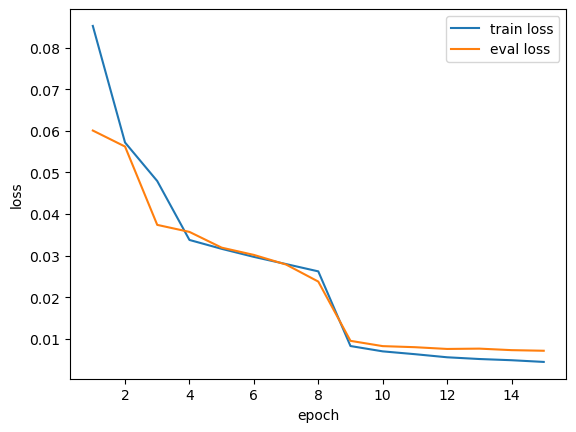

In [8]:
trainer = Trainer(**trainer_config)
trainer.train(train_data=train_dataloader, eval_data=test_dataloader)

In [9]:
outputs = trainer.predict(test_dataloader, return_preds=True)

In [10]:
outputs

{'predictions': array([7., 2., 1., ..., 4., 5., 6.]),
 'gt': array([7., 2., 1., ..., 4., 5., 6.]),
 'metric': 0.9608}

Accuracy score: 0.9608


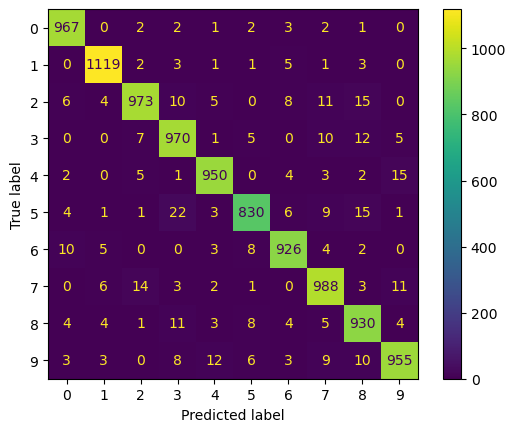

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

acc = accuracy_score(outputs["gt"], outputs["predictions"])
print("Accuracy score:", acc)
cm = confusion_matrix(outputs["gt"], outputs["predictions"], labels=list(range(0, 10)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(0, 10)))
disp.plot();